# Advanced Regression Assignment

## Niladri Banerjee
## Date of Submission - July 20, 2020


### Steps

### 1. Read the Data
### 2. See the info, stats to understand the data
### 3. Data Treatment
      - removing columns with high no of missing values 
      - missing value imputation
      - derived features creation (convert the year columns into age cols)
### 4. EDA - find the variables which are significant to the target variable
      - pairplot  - numerical vars with target variable 
      - heatmap   - numerical variables - multicollinearity, target variable dependence
      - goal    --> analyze which variables are significant visually
### 5. Feature engineering
      - label encoding 
      - one hot encoding
      - target variable tarnsformation to normalize      
### 6. Model Building
      - Train-Test split (70%-30%)
      - Scale data using Standard scaler
      - Create X and y
      - RFE [top 50 features]
      - Build model for Lasso and Ridge
      - Perform Gridsearch to get optimal values for lambda
      - Re-run the model on test dataset using lambda optimal

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import datetime

%matplotlib inline

import seaborn as sns

import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

pd.options.display.max_colwidth = 200
pd.options.display.max_rows=100
pd.options.display.max_columns=500

import warnings
warnings.filterwarnings('ignore')

### 1. Read the Data

In [64]:
data = pd.read_csv('train.csv')

In [65]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2. See the info, stats to understand the data

In [66]:
data.shape

(1460, 81)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [68]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [69]:
# checking null values
NA_col = data.isnull().sum()
# find out columns which have nulls
NA_col = NA_col[NA_col > 0]
# % of columns missing
print(round(100*NA_col[NA_col > 0]/len(data),2))

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


### 3. Data Treatment

In [70]:
# Dropping columns which have high values missing + I
data.drop(['Id','LotFrontage','Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature', 'MoSold','Street', 'Utilities'], axis=1, inplace = True)

In [71]:
data.shape

(1460, 71)

In [72]:
# checking null values
NA_col = data.isnull().sum()
# find out columns which have nulls
NA_col = NA_col[NA_col > 0]
# % of columns missing
print(round(100*NA_col[NA_col > 0]/len(data),2))

MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64


In [73]:
# Converting years to age
data['YearBuilt_Age'] = data['YearBuilt'].max() - data['YearBuilt']
data['YearRemodAdd_Age'] = data['YearRemodAdd'].max() - data['YearRemodAdd']
data['YrSold_Age'] = data['YrSold'].max() - data['YrSold']
data['GarageYrBlt_Age'] = data['GarageYrBlt'].max() - data['GarageYrBlt']

# Dropping columns
data.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [74]:
data[['YearBuilt_Age','YearRemodAdd_Age','YrSold_Age','GarageYrBlt_Age']].head(10)

,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,7,7,2,7.0
1,34,34,3,34.0
2,9,8,2,9.0
3,95,40,4,12.0
4,10,10,2,10.0
5,17,15,1,17.0
6,6,5,3,6.0
7,37,37,1,37.0
8,79,60,2,79.0
9,71,60,2,71.0


#### Impute missing values

In [75]:
def treat_Missing_Values(df):    
    
    # checking null values
    NA_col = df.isnull().sum()
    # find out columns which have nulls
    NA_col = NA_col[NA_col > 0]

    for col in NA_col.index:
        if df[col].dtype.name == 'object':
            # impute mode
            df[col].fillna(data[col].mode()[0], inplace=True)
            
        elif df[col].dtype.name == 'float64' or df[col].dtype.name == 'int64' or df[col].dtype.name == 'int32':
            # impute median
            df[col] = df[col].fillna((df[col].median()))
            
        else:
            print('Unable to detect the datatype for col - ', col)
            
    return df

In [76]:
data = treat_Missing_Values(data)

In [77]:
# checking null values
round(data.isnull().sum()/len(data.index),2)[round(data.isnull().sum()/ len(data.index),2).values>0.00]

Series([], dtype: float64)

### 4. EDA - find the variables which are significant to the target variable

#### Heatmap

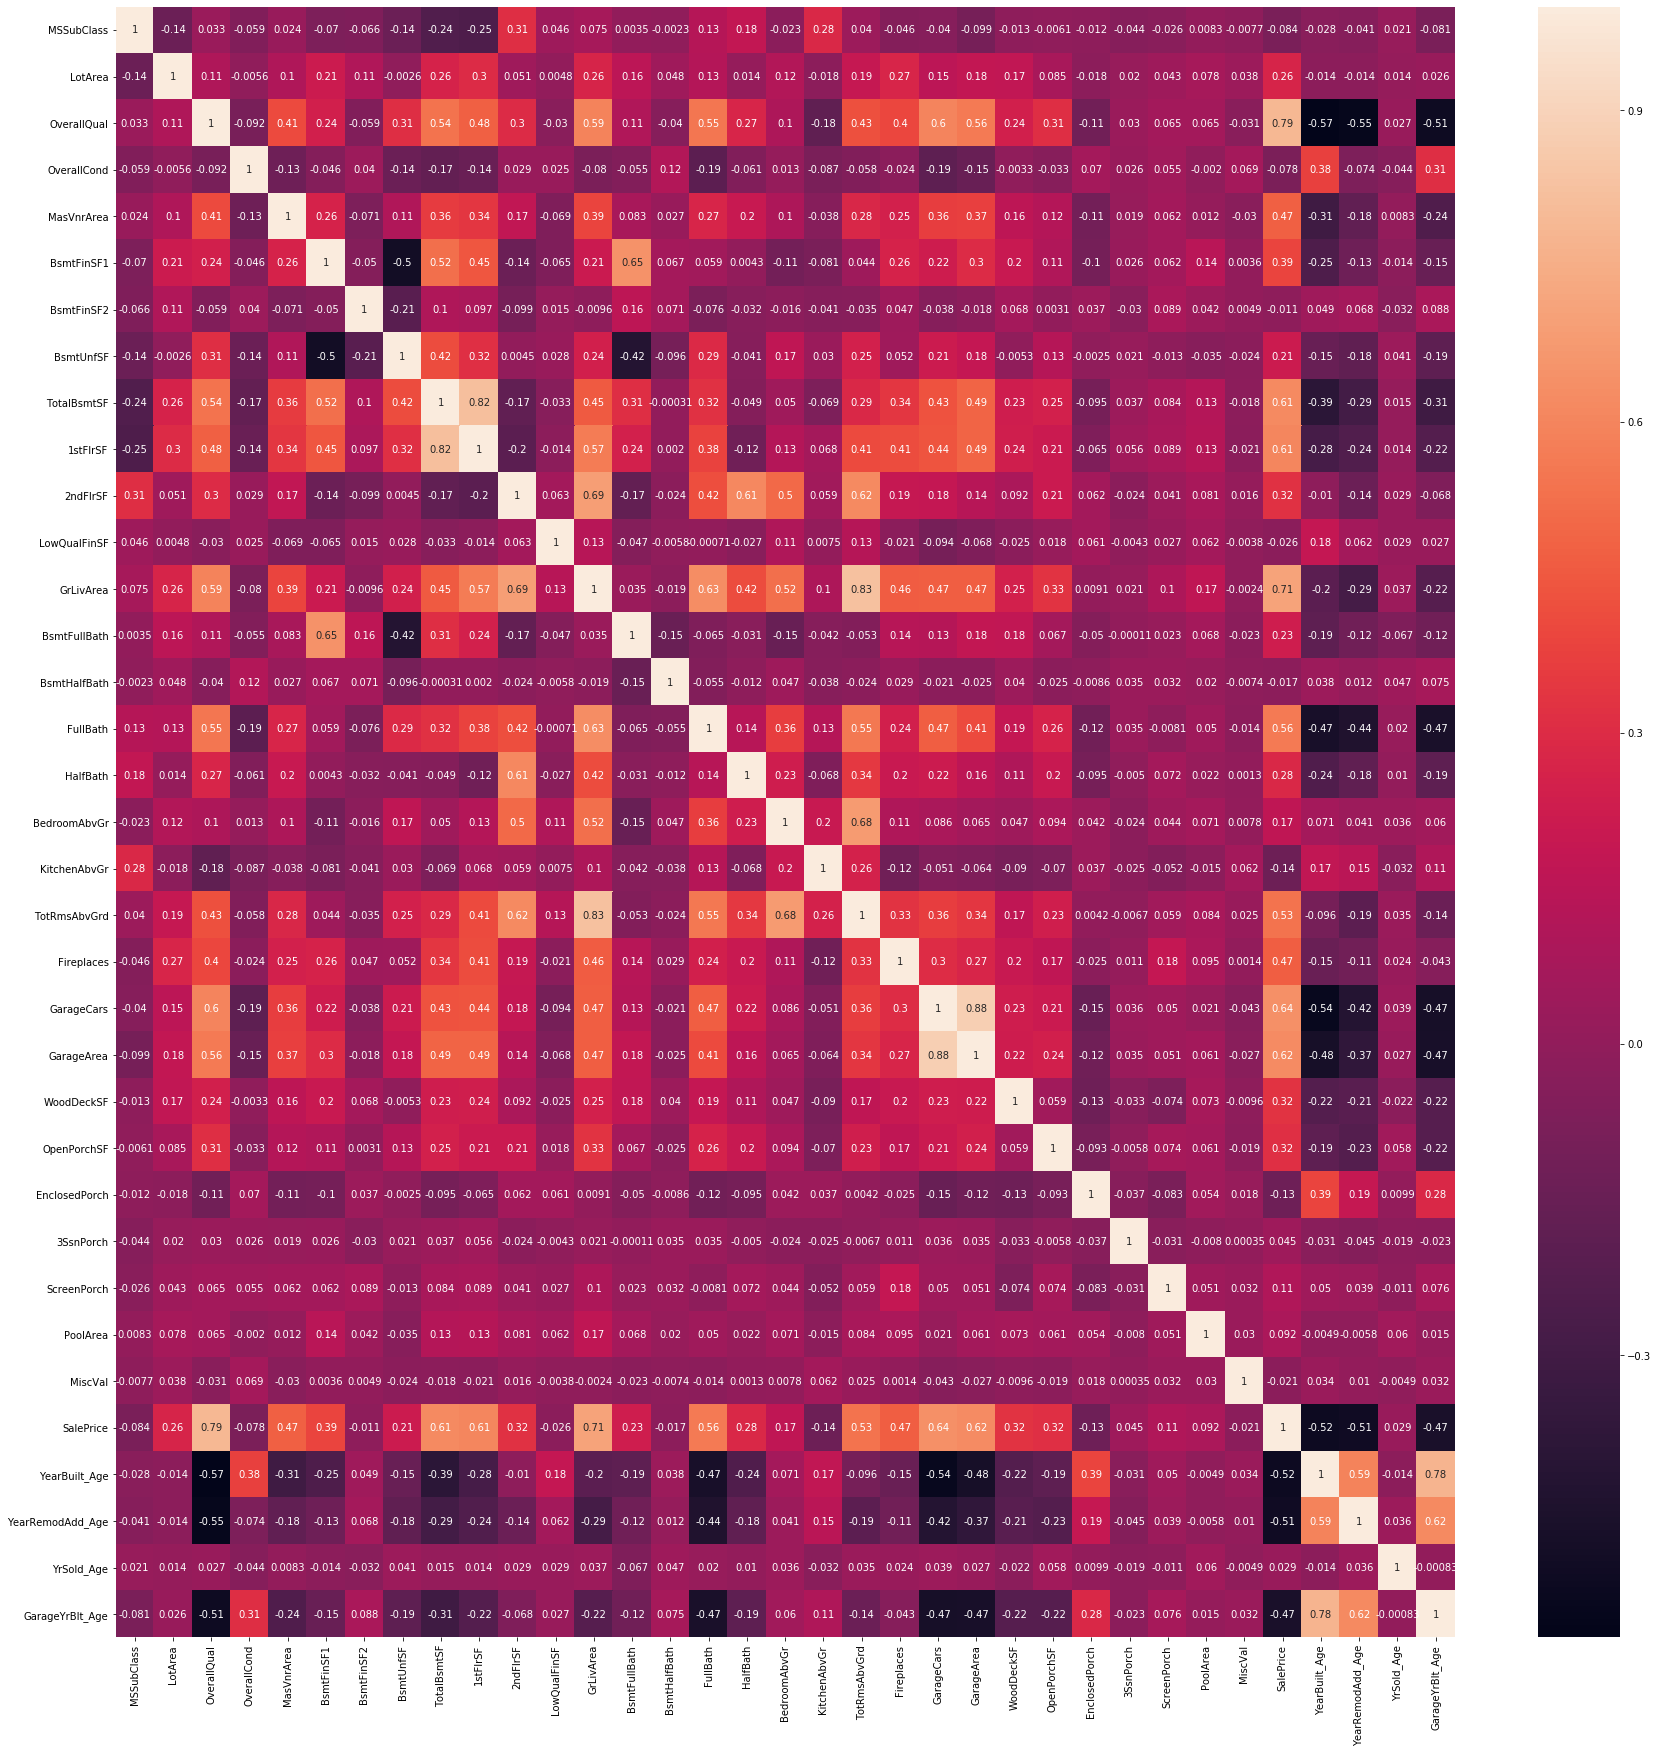

In [78]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(data.corr(), 
            xticklabels=data.corr().columns.values,
            yticklabels=data.corr().columns.values,annot= True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [79]:
corr_val = data[list(data.dtypes[data.dtypes != 'object'].index)].corr()

In [80]:
corr_coef = corr_val[corr_val['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_coef[1:])
corr_coef_cols = [idx for idx in corr_coef.index]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


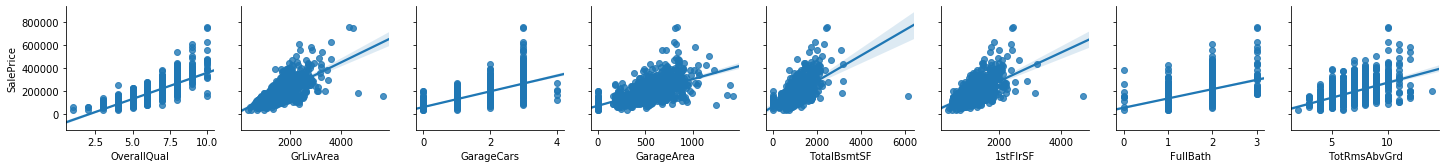

In [81]:
# Draw Pair plot for the correlated features
sns.pairplot(data, x_vars=corr_coef_cols[1:], y_vars=[corr_coef_cols[0]], kind="reg" )

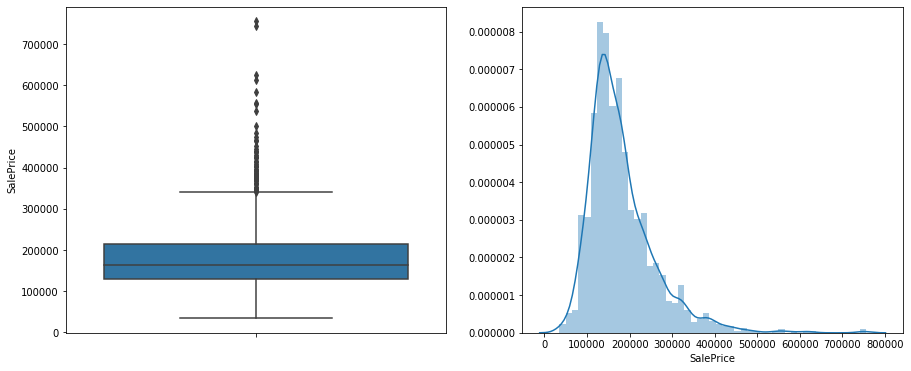

In [82]:
# Let us check the SalePrice as well
f, axes = plt.subplots(1, 2, figsize=(15,6))
sns.boxplot(data['SalePrice'],  orient='v' , ax=axes[0])
sns.distplot(data['SalePrice'], ax=axes[1])
plt.show()

### 5. Feature engineering

#### Label Encoding

In [83]:
def label_encoding(colNames):
    for colName in colNames:
        unique_vals = data[colName].unique()
        map_vals = {}
        for idx, val in enumerate(unique_vals):
            map_vals[val] = idx
        data[colName] = data[colName].map(map_vals)

In [84]:
cat_col_list = ['LandSlope', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 
                'GarageFinish', 'GarageQual', 'GarageCond', 'ExterCond', 'LotShape']
label_encoding(cat_col_list)

In [85]:
data[cat_col_list].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1
3,0,1,1,1,0,1,0,1,0,0,1,0,0,0,1
4,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1


#### One Hot Encoding

In [86]:
dummy_col_names = ['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']
dummies = pd.get_dummies(data[dummy_col_names], drop_first = True)
data = pd.concat([data, dummies], axis = 1)
data.drop(dummy_col_names, axis = 1, inplace = True)

In [87]:
data.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,0,0,7,5,196.0,0,0,0,0,0,0,706,0,0,150,856,0,0,856,854,0,1710,1,0,2,1,3,1,0,8,0,0,2,548,0,0,0,61,0,0,0,0,0,208500,7,7,2,7.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,0,0,6,8,0.0,1,0,0,0,1,1,978,0,0,284,1262,0,0,1262,0,0,1262,0,1,2,0,3,1,1,6,1,0,2,460,0,0,298,0,0,0,0,0,0,181500,34,34,3,34.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,11250,1,0,7,5,162.0,0,0,0,0,2,0,486,0,0,

In [88]:
data.shape

(1460, 195)

#### Target variable transformation

In [89]:
# Transform SalePrice
data['SalePrice'] = np.log1p(data['SalePrice'])

### 6. Model Building

In [90]:
# Create train and test data
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [91]:
# Scale data
scaler_col = ['MSSubClass','LotArea','OverallQual','OverallCond', 'MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF',
              'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
              'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
              'OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[scaler_col] = scaler.fit_transform(df_train[scaler_col])
df_test[scaler_col] = scaler.transform(df_test[scaler_col])

In [92]:
df_train.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657071,-0.473765,0,0,-0.779861,0.383154,-0.558025,1,0,1,0,0,3,0.043512,0,-0.293313,-0.374367,-0.430911,2,1,-0.765065,-0.787597,-0.124502,-1.228053,1.066863,-0.247791,-1.026085,-0.751723,-1.042717,-0.234155,1,-0.935650,-0.925422,1,-2.366798,-2.217786,0,0,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,-1.335436,85,60,2,30.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
318,0.035976,-0.056845,0,1,0.649651,-0.533005,0.809137,0,0,0,0,1,0,1.160345,0,-0.293313,-0.454644,0.621579,0,0,0.511914,2.140556,-0.124502,2.123103,1.066863,-0.247791,0.786428,1.246998,1.396261,-0.234155,0,1.556976,0.623522,0,1.645101,0.867506,0,0,1.

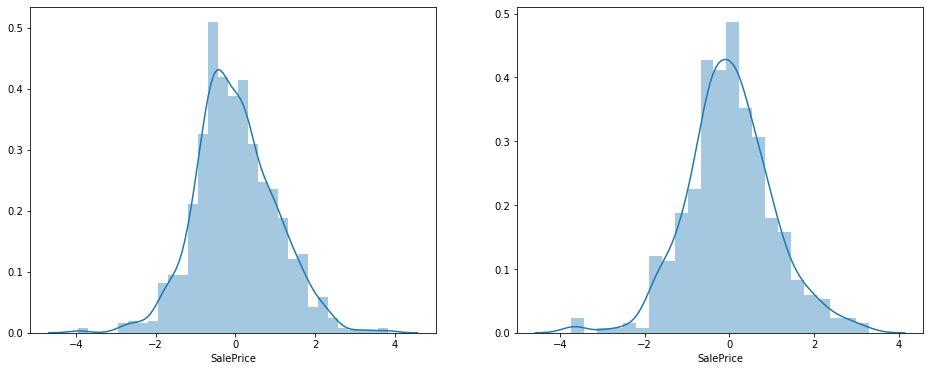

In [93]:
# Let us check if the target variable is normal in both train and test dataset
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [94]:
# Create X and y
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [95]:
# RFE
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=50, step=1, verbose=0)

In [96]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

In [97]:
col = X_train.columns[rfe.support_]

In [98]:
col

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageCars', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition2_PosN',
       'Condition2_RRAn', 'HouseStyle_2.5Fin', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior2nd_AsphShn',
       'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_PConc',
       'Foundation_Stone', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall',
       'Functional_Maj2', 'Functional_Sev', 'Functional_Typ',
       'GarageType_Basment', 'GarageType_Detchd', 'PavedDrive_Y',
       'SaleType_Con', 'SaleType_New', 'SaleType_Oth', 'SaleCondition_Normal',
  

In [99]:
# Modify the X_train and X_test
X_train = X_train[col]
X_test = X_test[col]

In [100]:
X_train.shape

(1021, 50)

In [101]:
X_test.shape

(438, 50)

### Lasso Regression model

In [102]:
#Lasso
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

# train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8786077466166402
0.8676593662636161


In [103]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col = col.insert(0,'Constant')
list(zip(col,model_parameter))

[('Constant', -0.9),
 ('OverallQual', 0.301),
 ('OverallCond', 0.113),
 ('BsmtFinSF1', 0.092),
 ('BsmtFinSF2', 0.032),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.075),
 ('GrLivArea', 0.314),
 ('KitchenAbvGr', -0.048),
 ('GarageCars', 0.195),
 ('MSZoning_FV', 0.373),
 ('MSZoning_RH', 0.414),
 ('MSZoning_RL', 0.491),
 ('MSZoning_RM', 0.162),
 ('Neighborhood_Crawfor', 0.315),
 ('Neighborhood_NridgHt', 0.205),
 ('Neighborhood_Somerst', 0.223),
 ('Condition2_PosN', -2.71),
 ('Condition2_RRAn', -0.0),
 ('HouseStyle_2.5Fin', -0.0),
 ('RoofStyle_Gable', -0.227),
 ('RoofStyle_Gambrel', -0.0),
 ('RoofStyle_Hip', -0.22),
 ('RoofMatl_CompShg', 0.311),
 ('RoofMatl_Membran', 0.0),
 ('RoofMatl_Metal', 0.0),
 ('RoofMatl_Roll', 0.0),
 ('RoofMatl_Tar&Grv', 0.052),
 ('RoofMatl_WdShake', 0.0),
 ('RoofMatl_WdShngl', 0.558),
 ('Exterior1st_AsphShn', -0.0),
 ('Exterior1st_BrkComm', -0.238),
 ('Exterior2nd_AsphShn', -0.0),
 ('Exterior2nd_Stucco', -0.373),
 ('Exterior2nd_Wd Shng', -0.138),
 ('Foundation_PConc', 

In [104]:
# Gridsearch Operation on Training data set
# Objective - Find optimal value of alpha

folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [105]:
cv_result_train_lasso = pd.DataFrame(model_cv.cv_results_)
cv_result_train_lasso['param_alpha'] = cv_result_train_lasso['param_alpha'].astype('float32')
cv_result_train_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.013791,0.002958,0.002099,0.000699,0.001,{'alpha': 0.001},0.887034,0.411533,0.895930,0.714358,0.922117,0.895166,0.871843,0.887015,0.891794,0.858153,0.823557,0.147592,1,0.876556,0.912452,0.878856,0.880153,0.873489,0.875699,0.877141,0.878621,0.878730,0.883170,0.881487,0.010615
1,0.007195,0.000870,0.002398,0.000490,0.010,{'alpha': 0.01},0.862976,0.476584,0.876290,0.720230,0.905398,0.864394,0.839259,0.886789,0.883384,0.854722,0.817048,0.123290,2,0.835941,0.873933,0.836301,0.850802,0.830734,0.834998,0.837086,0.834553,0.834930,0.838084,0.840736,0.012130
2,0.006597,0.000663,0.002498,0.000500,0.100,{'alpha': 0.1},0.789493,0.548315,0.798458,0.673473,0.822868,0.785096,0.728311,0.823360,0.786508,0.804526,0.756073,0.081683,3,0.763446,0.806035,0.767486,0.782474,0.760323,0.767499,0.773447,0.763428,0.766586,0.765004,0.771573,0.012924
3,0.005997,0.000632,0.002198,0.000748,1.000,{'alpha': 1.0},-0.015358,-0.033031,-0.002682,-0.002716,-0.055402,-0.003338,-0.004699,-0.001490,-0.000359,-0.001537,-0.012064,0.017295,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.010994,0.011395,0.003498,0.000923,5.000,{'alpha': 5.0},-0.015358,-0.033031,-0.002682,-0.002716,-0.055402,-0.003338,-0.004699,-0.001490,-0.000359,-0.001537,-0.012064,0.017295,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [106]:
def r2_score(cv_result, is_log=False):
    plt.figure(figsize=(12,6))
    plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
    plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
    if is_log == True:
        plt.xscale('log')
    plt.ylabel('R2 Score')
    plt.xlabel('Alpha')
    plt.show()

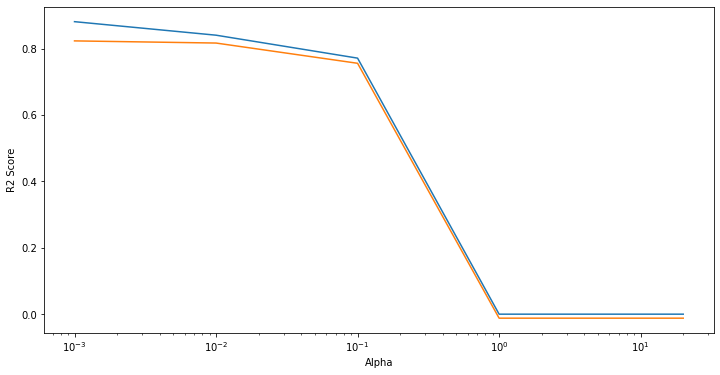

In [107]:
r2_score(cv_result_train_lasso, True)

In [108]:
print('For Lasso, the Best Alpha value = ', model_cv.best_params_['alpha'])

For Lasso, the Best Alpha value =  0.001


In [109]:
# Now that we have optimal value of alpha = 0.001, we can use this alpha to run the model again
#Lasso
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

# train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8786077466166402
0.8676593662636161


### Lasso Results on Test dataset
    *** R2 score = 0.87 ***

### Ridge Regression Model

In [110]:
#Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

# train score
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_train, y_train_pred))

# test score
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_test, y_test_pred))

0.9224322168863818
0.850911663631194


In [111]:
# Gridsearch Operation on Training data set
# Objective - Find optimal value of alpha

folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [112]:
cv_result_train_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_train_ridge['param_alpha'] = cv_result_train_ridge['param_alpha'].astype('float32')
cv_result_train_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005098,0.001135,0.001898,0.000538,0.001,{'alpha': 0.001},0.900795,0.396321,0.905548,0.636824,0.407960,0.910202,0.461202,0.338906,0.912334,0.849926,0.672226,0.235661,7,0.923558,0.923299,0.922752,0.923973,0.918817,0.922984,0.922431,0.922766,0.922595,0.927269,0.923044,0.001940
1,0.006697,0.002757,0.002497,0.001626,0.010,{'alpha': 0.01},0.900951,0.397394,0.905549,0.644174,0.488078,0.910450,0.524356,0.421528,0.912115,0.849596,0.695620,0.210252,6,0.923175,0.923295,0.922385,0.923622,0.918527,0.922602,0.922138,0.922481,0.922230,0.926898,0.922735,0.001927
2,0.005896,0.000700,0.002399,0.000490,0.100,{'alpha': 0.1},0.899231,0.406919,0.901705,0.676124,0.792190,0.909670,0.770941,0.742877,0.906519,0.846700,0.785399,0.147486,5,0.912700,0.923002,0.912358,0.914000,0.909541,0.912054,0.913006,0.913503,0.912240,0.916694,0.913910,0.003473
3,0.005397,0.000799,0.001998,0.000447,1.000,{'alpha': 1.0},0.894094,0.448555,0.895478,0.704455,0.920064,0.903028,0.878157,0.885024,0.893016,0.849823,0.827235,0.138776,4,0.884302,0.914869,0.885257,0.890543,0.880897,0.883280,0.884496,0.885032,0.885275,0.889074,0.888302,0.009226
4,0.005298,0.000639,0.002398,0.000490,5.000,{'alpha': 5.0},0.886895,0.473609,0.895027,0.712993,0.918905,0.893229,0.874350,0.889603,0.892867,0.858104,0.829614,0.130460,2,0.866065,0.899908,0.867344,0.878435,0.862359,0.865282,0.866939,0.866765,0.867391,0.870484,0.871097,0.010410


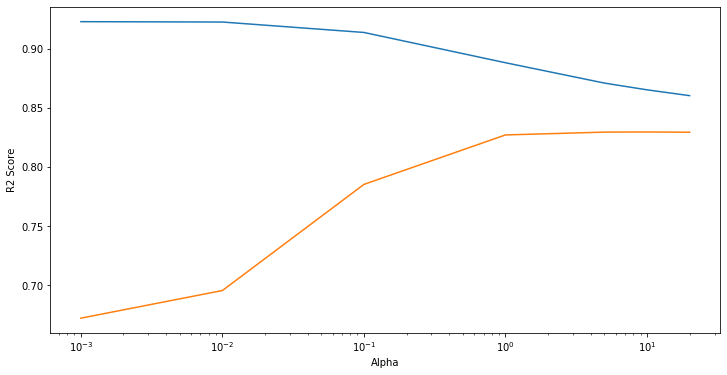

In [113]:
# plot r2_score using the defined function for ridge
r2_score(cv_result_train_ridge, True)

In [114]:
print('For Ridge, the Best Alpha value = ', model_cv.best_params_['alpha'])

For Ridge, the Best Alpha value =  10.0


In [115]:
# Now that we have optimal value of alpha = 0.001, we can use this alpha to run the model again
#Ridge
ridge = Ridge(alpha=10)
ridge.fit(X_train,y_train)

# train score
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_train, y_train_pred))

# test score
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_test, y_test_pred))

0.8643256086417503
0.8794517512295326


In [116]:
# ridge coefficients
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col = col.insert(0,'Constant')
list(zip(col,model_parameter))

[('Constant', -0.624),
 ('OverallQual', 0.309),
 ('OverallCond', 0.117),
 ('BsmtFinSF1', 0.077),
 ('BsmtFinSF2', 0.031),
 ('BsmtUnfSF', -0.007),
 ('TotalBsmtSF', 0.082),
 ('GrLivArea', 0.295),
 ('KitchenAbvGr', -0.045),
 ('GarageCars', 0.201),
 ('MSZoning_FV', 0.163),
 ('MSZoning_RH', 0.161),
 ('MSZoning_RL', 0.272),
 ('MSZoning_RM', -0.048),
 ('Neighborhood_Crawfor', 0.267),
 ('Neighborhood_NridgHt', 0.198),
 ('Neighborhood_Somerst', 0.203),
 ('Condition2_PosN', -0.326),
 ('Condition2_RRAn', -0.009),
 ('HouseStyle_2.5Fin', -0.045),
 ('RoofStyle_Gable', -0.114),
 ('RoofStyle_Gambrel', 0.015),
 ('RoofStyle_Hip', -0.114),
 ('RoofMatl_CompShg', 0.138),
 ('RoofMatl_Membran', 0.042),
 ('RoofMatl_Metal', 0.04),
 ('RoofMatl_Roll', 0.009),
 ('RoofMatl_Tar&Grv', 0.059),
 ('RoofMatl_WdShake', 0.016),
 ('RoofMatl_WdShngl', 0.188),
 ('Exterior1st_AsphShn', -0.014),
 ('Exterior1st_BrkComm', -0.129),
 ('Exterior2nd_AsphShn', -0.014),
 ('Exterior2nd_Stucco', -0.264),
 ('Exterior2nd_Wd Shng', -0.12),


### Ridge Results on Test dataset
    *** R2 score = 0.88 *** 
    - This is very close to Lasso result as well

## Supporting Code for Subjective Questions - Problem statement - II

In [117]:
def run_multiple_alphas(model,alphas):
    
    feature_ridge_df = pd.DataFrame(columns=['feature'], data=X_train.columns)
    feature_lasso_df = pd.DataFrame(columns=['feature'], data=X_train.columns)
    
    for alpha in alphas:
        if model == 'ridge':
            ridge = Ridge(alpha=alpha)
            ridge.fit(X_train, y_train)
            # Creating feature/coefficient map for future use
            feature_ridge_df['Alpha: '+str(alpha)] = ridge.coef_
        elif model == 'lasso':
            lasso = Lasso(alpha=alpha)
            lasso.fit(X_train, y_train)
            # Creating feature/coefficient map for future use
            feature_lasso_df['Alpha: '+str(alpha)] = lasso.coef_
    
    if model == 'ridge':
        return feature_ridge_df
    else:
        return feature_lasso_df

In [118]:
lasso_df = run_multiple_alphas('lasso',[0.001,0.002,0.01,0.02,0.05,5])

In [119]:
lasso_df.head()

,feature,Alpha: 0.001,Alpha: 0.002,Alpha: 0.01,Alpha: 0.02,Alpha: 0.05,Alpha: 5
0,OverallQual,0.301045,0.310289,0.366223,0.384484,0.428425,0.0
1,OverallCond,0.112916,0.116454,0.109377,0.085612,0.019883,-0.0
2,BsmtFinSF1,0.092045,0.087095,0.073458,0.068008,0.056328,0.0
3,BsmtFinSF2,0.031618,0.031925,0.017569,0.006950,0.000000,0.0
4,BsmtUnfSF,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0


In [120]:
print(lasso_df[lasso_df['Alpha: 0.001'] == 0][['feature', 'Alpha: 0.001']].shape)
print(lasso_df[lasso_df['Alpha: 0.002'] == 0][['feature', 'Alpha: 0.002']].shape)
print(lasso_df[lasso_df['Alpha: 0.01'] == 0][['feature', 'Alpha: 0.01']].shape)
print(lasso_df[lasso_df['Alpha: 0.02'] == 0][['feature', 'Alpha: 0.02']].shape)
print(lasso_df[lasso_df['Alpha: 0.05'] == 0][['feature', 'Alpha: 0.05']].shape)
print(lasso_df[lasso_df['Alpha: 5'] == 0][['feature', 'Alpha: 5']].shape)

(16, 2)
(25, 2)
(37, 2)
(38, 2)
(41, 2)
(50, 2)


### Conclusion - For Lasso, As we increase the alpha, more coefficients become zero 

#### Lasso alphas

In [121]:
# We know alpha = 0.001 is optimal value
lasso_df = lasso_df[['feature','Alpha: 0.001', 'Alpha: 0.002']]
lasso_df = lasso_df.reindex(lasso_df['Alpha: 0.002'].abs().sort_values(ascending=False).index)
lasso_df['predictors'] = lasso_df['feature'].apply(lambda x:x.split('_')[0])

In [122]:
lasso_df.head(10)

,feature,Alpha: 0.001,Alpha: 0.002,predictors
16,Condition2_PosN,-2.709925,-1.594973,Condition2
11,MSZoning_RL,0.490597,0.319757,MSZoning
0,OverallQual,0.301045,0.310289,OverallQual
32,Exterior2nd_Stucco,-0.372629,-0.306895,Exterior2nd
6,GrLivArea,0.314042,0.301833,GrLivArea
13,Neighborhood_Crawfor,0.315179,0.276308,Neighborhood
15,Neighborhood_Somerst,0.222843,0.226986,Neighborhood
43,GarageType_Detchd,-0.195671,-0.202453,GarageType
8,GarageCars,0.195319,0.201445,GarageCars
34,Foundation_PConc,0.187656,0.191621,Foundation


In [123]:
x = lasso_df[['feature','Alpha: 0.002','predictors']]

#### Ridge alphas

In [124]:
ridge_df = run_multiple_alphas('ridge',[10,20])

In [125]:
ridge_df.head()

,feature,Alpha: 10,Alpha: 20
0,OverallQual,0.308991,0.314385
1,OverallCond,0.116776,0.116685
2,BsmtFinSF1,0.076940,0.077265
3,BsmtFinSF2,0.030711,0.030380
4,BsmtUnfSF,-0.007064,-0.005491


In [126]:
# We know alpha = 10 is optimal value
ridge_df = ridge_df[['feature','Alpha: 10','Alpha: 20']]
ridge_df = ridge_df.reindex(ridge_df['Alpha: 20'].abs().sort_values(ascending=False).index)
ridge_df['predictors'] = ridge_df['feature'].apply(lambda x:x.split('_')[0])

In [129]:
ridge_df.head(10)

,feature,Alpha: 10,Alpha: 20,predictors
0,OverallQual,0.308991,0.314385,OverallQual
6,GrLivArea,0.295039,0.288255,GrLivArea
11,MSZoning_RL,0.271767,0.206862,MSZoning
13,Neighborhood_Crawfor,0.266971,0.206457,Neighborhood
8,GarageCars,0.201261,0.204325,GarageCars
43,GarageType_Detchd,-0.206690,-0.202810,GarageType
32,Exterior2nd_Stucco,-0.264038,-0.195087,Exterior2nd
34,Foundation_PConc,0.189565,0.188486,Foundation
16,Condition2_PosN,-0.325633,-0.169767,Condition2
14,Neighborhood_NridgHt,0.198011,0.166467,Neighborhood
